In [1]:
import matplotlib.pyplot as plt
import nest
import numpy as np
import os
from pynestml.frontend.pynestml_frontend import generate_nest_target


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0-post0.dev0
 Built: Jul 13 2025 01:06:24

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
def generate_code(neuron_model: str, models_path=""):
    """
    Generate NEST code for neuron model with gap junction support.
    Parameters
    ----------
    neuron_model : str
        Name of the neuron model to compile. This should correspond to a 
        .nestml file containing the neuron model definition.
    models_path : str, optional
        Path to the directory containing the NESTML model files.
        Default is empty string (current directory).
    """
    codegen_opts = {"gap_junctions": {"enable": True,
                                        "gap_current_port": "I_stim",
                                        "membrane_potential_variable": "V_m"}}

    files = os.path.join(models_path, neuron_model + ".nestml")
    generate_nest_target(input_path=files,
                            logging_level="WARNING",
                            module_name="nestml_gap_" + neuron_model + "_module",
                            suffix="_nestml",
                            codegen_opts=codegen_opts)

    return neuron_model

generate_code(neuron_model="eglif_cond_alpha_multisyn", models_path="../nest_models")


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0-post0.dev0
 Built: Jul 13 2025 01:06:24

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.

[20,eglif_cond_alpha_multisyn_nestml, WARNING, [114:35;114:46]]: Model contains a call to fixed-timestep functions (``resolution()`` and/or ``steps()``). This restricts the model to being compatible only with fixed-timestep simulators. Consider eliminating ``resolution()`` and ``steps()`` from the model, and using ``timestep()`` instead.
[21,eglif_cond_alpha_multisyn_nestml, WARNING, [135:56;135:67]]: Model contains a call to fixed-timestep functions (``resolution()`` and/or ``steps()``). This restricts the model to being compatible only with fixed-timestep simulators. Consider eliminating ``resolution()`` and ``steps()`` from the model, and using ``t

CMake Warning:
  Ignoring empty string ("") provided on the command line.


-- The CXX compiler identification is GNU 9.4.0
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done

-------------------------------------------------------
nestml_gap_eglif_cond_alpha_multisyn_module Configuration Summary
-------------------------------------------------------

C++ compiler         : /usr/bin/c++
Build static libs    : OFF
C++ compiler flags   : 
NEST compiler flags  :  -std=c++17 -Wall -fopenmp -pthread -O2 -fdiagnostics-color=auto
NEST include dirs    :  -I/home/niccolo/Projects/Neuro/cereb_env/include/nest -I/usr/include -I/usr/include -I/usr/include -I/usr/lib/x86_64-linux-gnu/openmpi/include/openmpi -I/usr/lib/x86_64-linux-gnu/openmpi/include -I/usr/include
NEST libraries flags : -L/home/niccolo/Projects/Neuro/cereb_env/lib/nest -lne

'eglif_cond_alpha_multisyn'


Aug 28 00:30:02 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.05 ms.

Aug 28 00:30:02 Install [Info]: 
    loaded module nestml_gap_eglif_cond_alpha_multisyn_module

Aug 28 00:30:02 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Aug 28 00:30:02 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 5000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Aug 28 00:30:03 SimulationManager::run [Info]: 
    Simulation finished.


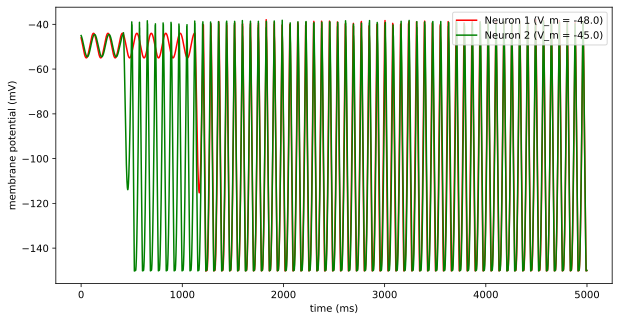

In [3]:
nest.ResetKernel()
nest.resolution = 0.05
nest.Install("nestml_gap_eglif_cond_alpha_multisyn_module")

neuron_nogap = nest.Create("eglif_cond_alpha_multisyn_nestml", 2)
neuron_nogap.set({
        "V_m": -45,
        "E_L": -45,
        "C_m": 189,
        "tau_m": 11,
        "I_e": -18.101,
        "k_adap": 1.928,
        "k_1": 0.191,
        "k_2": 0.090909,

        # V Threshold, Refractory Period and Escape rate
        "V_th": -40,
        "t_ref": 1,
        "tau_V": 0.8,
        "lambda_0": 1.2,

        # Reset on Spike
        "V_reset": -45,
        "A1": 1810.923,
        "A2": 1358.197,

        # Postsynaptic receptor
        "tau_syn1": 1,
        "tau_syn2": 60,
        "E_rev1": 0,
        "E_rev2": -80,
        })


neuron_nogap[0].V_m = -46.0 

vm_nogap = nest.Create("voltmeter", params={"interval": 0.1})
nest.Connect(vm_nogap, neuron_nogap, "all_to_all")

nest.Simulate(5000.0)
v_m_values_nogap = vm_nogap.events["V_m"]

senders_nogap = vm_nogap.events["senders"]
times_nogap = vm_nogap.events["times"]
plt.figure(figsize=(10, 5))
plt.plot(
    times_nogap[np.where(senders_nogap == 1)], v_m_values_nogap[np.where(senders_nogap == 1)], "r-",
    label="Neuron 1 (V_m = -48.0)")
plt.plot(
    times_nogap[np.where(senders_nogap == 2)], v_m_values_nogap[np.where(senders_nogap == 2)], "g-", label="Neuron 2 (V_m = -45.0)")
plt.legend(loc='upper right')
plt.xlabel("time (ms)")
plt.ylabel("membrane potential (mV)")
plt.show()


Aug 28 00:30:03 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.05 ms.

Aug 28 00:30:03 Install [Info]: 
    loaded module nestml_gap_eglif_cond_alpha_multisyn_module

Aug 28 00:30:03 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Aug 28 00:30:03 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 5000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Aug 28 00:30:03 SimulationManager::run [Info]: 
    Simulation finished.


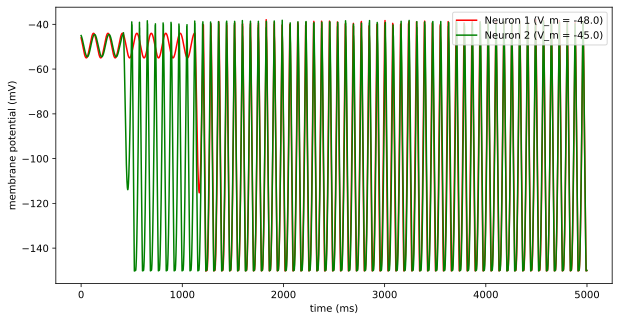

In [4]:
nest.ResetKernel()
nest.resolution = 0.05
nest.Install("nestml_gap_eglif_cond_alpha_multisyn_module")

neuron_gap = nest.Create("eglif_cond_alpha_multisyn_nestml", 2)
neuron_gap.set({
        "V_m": -45,
        "E_L": -45,
        "C_m": 189,
        "tau_m": 11,
        "I_e": -18.101,
        "k_adap": 1.928,
        "k_1": 0.191,
        "k_2": 0.090909,

        # V Threshold, Refractory Period and Escape rate
        "V_th": -40,
        "t_ref": 1,
        "tau_V": 0.8,
        "lambda_0": 1.2,

        # Reset on Spike
        "V_reset": -45,
        "A1": 1810.923,
        "A2": 1358.197,

        # Postsynaptic receptor
        "tau_syn1": 1,
        "tau_syn2": 60,
        "E_rev1": 0,
        "E_rev2": -80,
        })


neuron_gap[0].V_m = -46.0 

vm_gap = nest.Create("voltmeter", params={"interval": 0.1})
nest.Connect(vm_gap, neuron_gap, "all_to_all")

nest.Connect(
    neuron_gap, neuron_gap, 
    {"rule": "all_to_all", "allow_autapses": False}, 
    {"synapse_model": "gap_junction", "weight": 5}
)

nest.Simulate(5000.0)
v_m_values_gap = vm_gap.events["V_m"]
senders_gap = vm_gap.events["senders"]
times_gap = vm_gap.events["times"]
plt.figure(figsize=(10, 5))
plt.plot(
    times_gap[np.where(senders_gap == 1)], v_m_values_gap[np.where(senders_gap == 1)], "r-",
    label="Neuron 1 (V_m = -48.0)")
plt.plot(
    times_gap[np.where(senders_gap == 2)], v_m_values_gap[np.where(senders_gap == 2)], "g-", label="Neuron 2 (V_m = -45.0)")
plt.legend(loc='upper right')
plt.xlabel("time (ms)")
plt.ylabel("membrane potential (mV)")
plt.show()

In [5]:
np.array_equal(v_m_values_gap, v_m_values_nogap)

True